In [83]:
import pandas as pd
import numpy as np

In [84]:
data = pd.read_csv("anime.csv")
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [85]:
data.tail()

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [86]:
data.shape

(12294, 7)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [88]:
data.isnull().sum() #finding missing value

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [89]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [90]:
data['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [91]:
data['rating'].value_counts()

6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: rating, Length: 598, dtype: int64

In [92]:
data['rating'].value_counts().sort_index()

1.67     1
1.92     1
2.00     1
2.14     1
2.37     1
        ..
9.33     1
9.37     1
9.50     1
9.60     1
10.00    1
Name: rating, Length: 598, dtype: int64

In [93]:
data['genre'].fillna('Unknown', inplace=True)  # Filling missing values
data['type'].fillna('Unknown', inplace=True)   # non-numeric = Unknown

rating_avg = data['rating'].mean()         # numeric value = avg value
data['rating'].fillna(rating_avg, inplace=True)

In [94]:
# verification of missing value
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [95]:
data['genre'].value_counts()

Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: genre, Length: 3265, dtype: int64

In [96]:
data['episodes'].value_counts()

1      5677
2      1076
12      816
13      572
26      514
       ... 
358       1
366       1
201       1
172       1
125       1
Name: episodes, Length: 187, dtype: int64

In [97]:
data['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Unknown      25
Name: type, dtype: int64

<Axes: >

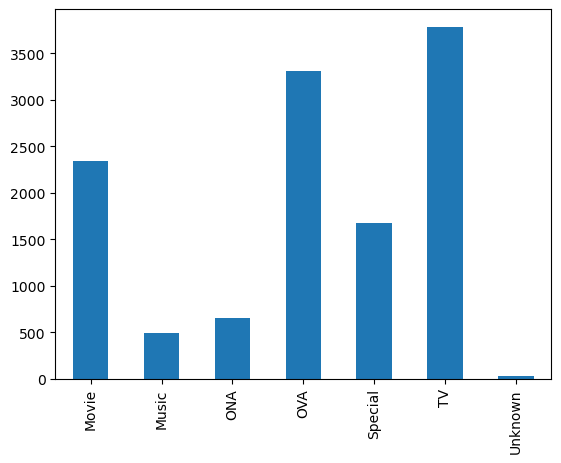

In [98]:
data['type'].value_counts().sort_index().plot(kind='bar')

In [99]:
# Normalization of rating and coverting categorical numric (genre)
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [100]:
gerne_enco = data['genre'].str.get_dummies(sep=', ')

scal = StandardScaler()
norm_rating = scal.fit_transform(data[['rating']])

# combine into a single DataFrame
feature = pd.concat([gerne_enco, pd.DataFrame(norm_rating, columns=['norm_rating'])])
feature.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,norm_rating
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [102]:
genre_enco =data['genre'].str.get_dummies(sep=',')

In [103]:
# normalising of rating.
scal = StandardScaler()
norm_rating = scal.fit_transform(data[['rating']])

In [104]:
# combining freature
feature = pd.concat([gerne_enco, pd.DataFrame(norm_rating, columns=['norm_rating'])],axis=1)

In [106]:
# computing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(feature)

# Using The Function to Recommend Anime

In [107]:
# Recommendation Function
def recommend_anime(anime_title, similarity_matrix, data, top_n=10):
    anime_idx = data[data['name'] == anime_title].index[0]
    similarity_scores = list(enumerate(similarity_matrix[anime_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similar_anime_indices = [i[0] for i in similarity_scores[1:top_n+1]]
    return data['name'].iloc[similar_anime_indices]

In [108]:
call = recommend_anime("Gintama°", similarity_matrix, data, top_n=5)
print("recommedation for 'Gintama°': ")
print(call)

recommedation for 'Gintama°': 
4                                         Gintama&#039;
9                              Gintama&#039;: Enchousen
8     Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
12                                              Gintama
63          Gintama: Yorinuki Gintama-san on Theater 2D
Name: name, dtype: object


In [109]:
call = recommend_anime("Under World", similarity_matrix, data, top_n=5)
print("recommedation for 'Under World': ")
print(call)

recommedation for 'Under World': 
12287                          Tenshi no Habataki Jun
12288                                The Satisfaction
12260                         Hokenshitsu de Aimashou
12289    Toushindai My Lover: Minami tai Mecha-Minami
12267                                   Lovely Series
Name: name, dtype: object
